In [ ]:
# Importing Libraries

# Data Handling
import pandas as pd

# Data Preprocessing & Splitting
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Plotting
import matplotlib.pyplot as plt

# Saving Models
import joblib

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully.")

Step 1: All libraries imported successfully.


In [20]:
# Dataset Loading

try:
    df = pd.read_csv('dataset.csv', on_bad_lines='skip')
    
    print("Dataset loaded successfully.")
    print("First 5 rows of the data:")
    print(df.head())
    
except FileNotFoundError:
    print("Error: 'dataset.csv' not found.")

Dataset loaded successfully.
First 5 rows of the data:
                                               Claim  Label
0  Berberine may help improve insulin sensitivity...      1
1  Applying a warm compress can ease sinus conges...      1
2      Eating garlic supports cardiovascular health.      1
3     Peppermint tea may help with mild indigestion.      1
4              Echinacea is a proven immune-booster.      0


In [21]:
# Data Preprocessing and Cleaning

print(f"Original data shape: {df.shape}")

print(f"Unique labels found (before cleaning): {df['Label'].unique()}")

df['Label'] = pd.to_numeric(df['Label'], errors='coerce')

df.dropna(subset=['Claim', 'Label'], inplace=True)

df = df[df['Label'].isin([0, 1])]

df['Label'] = df['Label'].astype(int)

print(f"\nUnique labels found (after cleaning): {df['Label'].unique()}")
print(f"Missing values after cleaning:\n{df.isnull().sum()}")
print(f"Data shape after cleaning: {df.shape}")

Original data shape: (9007, 2)
Unique labels found (before cleaning): [1 0]

Unique labels found (after cleaning): [1 0]
Missing values after cleaning:
Claim    0
Label    0
dtype: int64
Data shape after cleaning: (9007, 2)


In [22]:
# Features (X) and Target (y)

X = df['Claim']  # The raw text data
y = df['Label']  # 0 or 1

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Features (X) shape: (9007,)
Target (y) shape: (9007,)


In [23]:
# Spliting Data into Training and Test Sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,    # 30% for testing
    train_size=0.7,   # 70% for training
    random_state=42,  # For reproducible results
    shuffle=True
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 6304 samples
Test set size: 2703 samples


In [24]:
# Vectorize Text & Clean Symbols (TF-IDF)

# Initialize the vectorizer. 
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vec = vectorizer.transform(X_test)

print("Text vectorization complete.")
print(f"Shape of vectorized training data: {X_train_vec.shape}")
print(f"Shape of vectorized test data: {X_test_vec.shape}")

Text vectorization complete.
Shape of vectorized training data: (6304, 2789)
Shape of vectorized test data: (2703, 2789)


In [25]:
# Training & Prediction using Logistic Regression

print("Training Logistic Regression model...")
model_lr = LogisticRegression(random_state=42)

# Model training on the vectorized training data
model_lr.fit(X_train_vec, y_train)

# Get binary predictions (0 or 1) for the test set
y_pred_lr = model_lr.predict(X_test_vec)

# Probability predictions for the AUC-ROC curve
y_proba_lr = model_lr.predict_proba(X_test_vec)[:, 1] 

print("Logistic Regression training complete.")

Training Logistic Regression model...
Logistic Regression training complete.


--- Logistic Regression Evaluation ---
Accuracy: 0.9523

Classification Report:
              precision    recall  f1-score   support

    Fake (0)       0.97      0.94      0.95      1348
    Real (1)       0.94      0.97      0.95      1355

    accuracy                           0.95      2703
   macro avg       0.95      0.95      0.95      2703
weighted avg       0.95      0.95      0.95      2703


Confusion Matrix:


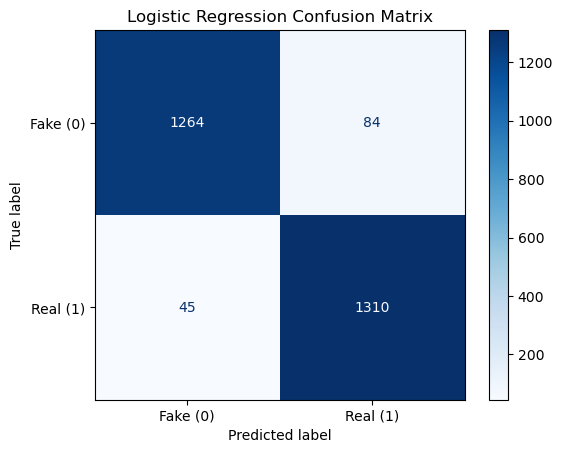

In [26]:
# Evaluating Logistic Regression Metrics

print("--- Logistic Regression Evaluation ---")

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, labels=[0, 1], target_names=['Fake (0)', 'Real (1)']))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=[0, 1])

# Plot the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, 
                              display_labels=['Fake (0)', 'Real (1)'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [27]:
# Logistic Regression AUC-ROC

# AUC score
auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f"Logistic Regression AUC Score: {auc_lr:.4f}")

# ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

Logistic Regression AUC Score: 0.9907


In [28]:
# Training & Prediction using SVM

print("Training SVM model...")

# Initializing
model_svm = SVC(random_state=42, probability=True)

# Model trainingodel
model_svm.fit(X_train_vec, y_train)

# Binary predictions (0 or 1)
y_pred_svm = model_svm.predict(X_test_vec)

# Probability predictions (AUC-ROC curve)
y_proba_svm = model_svm.predict_proba(X_test_vec)[:, 1]

print("SVM training complete.")

Training SVM model...
SVM training complete.


SVM Evaluation
Accuracy: 0.9612

Classification Report:
              precision    recall  f1-score   support

    Fake (0)       0.97      0.95      0.96      1348
    Real (1)       0.95      0.97      0.96      1355

    accuracy                           0.96      2703
   macro avg       0.96      0.96      0.96      2703
weighted avg       0.96      0.96      0.96      2703


Confusion Matrix:


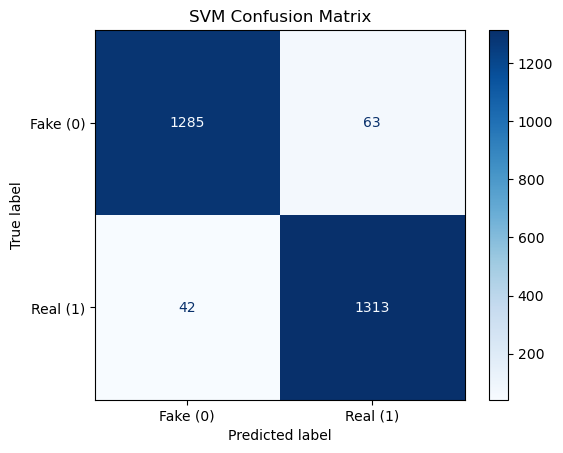

In [29]:
# Evaluateing SVM Metrics

print("SVM Evaluation")

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, labels=[0, 1], target_names=['Fake (0)', 'Real (1)']))

# Graphical Confusion Matrix
print("\nConfusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=[0, 1])

# Matrix ploting
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, 
                              display_labels=['Fake (0)', 'Real (1)'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("SVM Confusion Matrix")
plt.show()

In [30]:
# Calculating SVM AUC-ROC

# AUC score
auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f"SVM AUC Score: {auc_svm:.4f}")

# ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)

SVM AUC Score: 0.9938


In [31]:
# Training & Prediction using Random Forest

print("Training Random Forest model...")

# Initialize the model
model_rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
model_rf.fit(X_train_vec, y_train)

# Binary predictions (0 or 1)
y_pred_rf = model_rf.predict(X_test_vec)

# Probability predictions for the AUC-ROC curve
y_proba_rf = model_rf.predict_proba(X_test_vec)[:, 1]

print("Random Forest training complete.")

Training Random Forest model...
Random Forest training complete.


Random Forest Evaluation
Accuracy: 0.9482

Classification Report:
              precision    recall  f1-score   support

    Fake (0)       0.95      0.94      0.95      1348
    Real (1)       0.94      0.95      0.95      1355

    accuracy                           0.95      2703
   macro avg       0.95      0.95      0.95      2703
weighted avg       0.95      0.95      0.95      2703


Confusion Matrix:


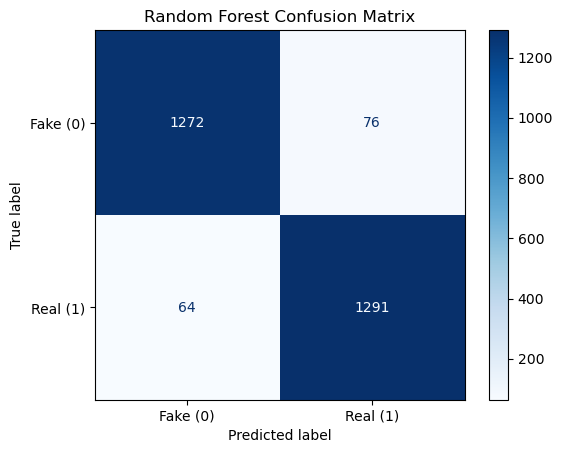

In [32]:
# Evaluating Random Forest Metrics

print("Random Forest Evaluation")

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, labels=[0, 1], target_names=['Fake (0)', 'Real (1)']))

# Graphical Confusion Matrix
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=[0, 1])

# Plot the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, 
                              display_labels=['Fake (0)', 'Real (1)'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [33]:
# Calculating Random Forest AUC-ROC

# AUC score
auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"Random Forest AUC Score: {auc_rf:.4f}")

# ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

Random Forest AUC Score: 0.9905


Model Comparison Summary
                     Accuracy  AUC Score  F1-Score (Real)
Model                                                    
SVM                  0.961154   0.993813         0.961553
Logistic Regression  0.952275   0.990729         0.953074
Random Forest        0.948206   0.990516         0.948567


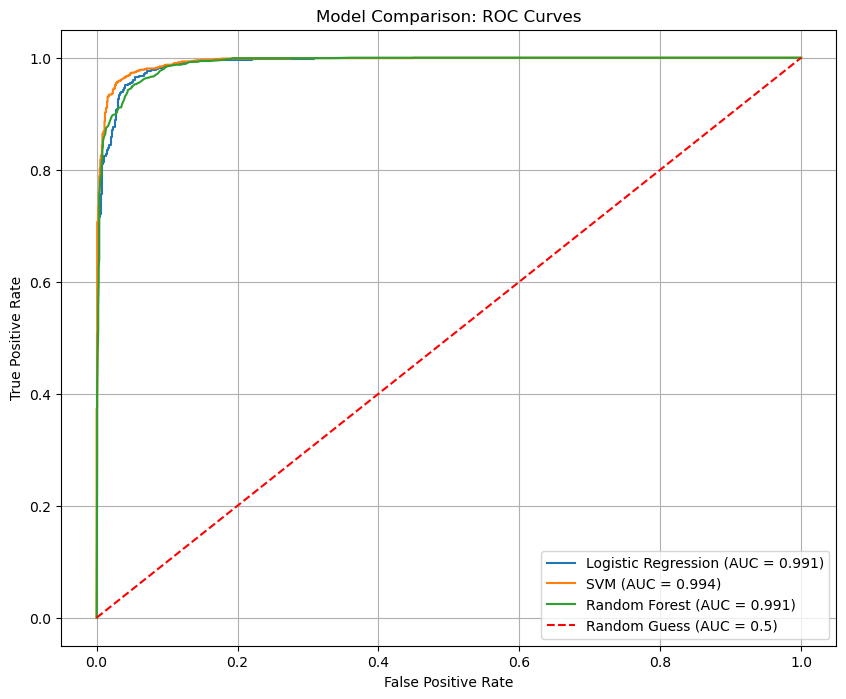

In [34]:
# Model Comparison

# 1. Classification reports
report_lr = classification_report(y_test, y_pred_lr, labels=[0, 1], output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, labels=[0, 1], output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, labels=[0, 1], output_dict=True)

# 2. F1-scores
f1_lr = report_lr['1']['f1-score']
f1_svm = report_svm['1']['f1-score']
f1_rf = report_rf['1']['f1-score']

# Comparing DataFrame using the accuracy, auc, and f1 variables
comparison_data = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_rf)],
    'AUC Score': [auc_lr, auc_svm, auc_rf],
    'F1-Score (Real)': [f1_lr, f1_svm, f1_rf]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.set_index('Model')

print("Model Comparison Summary")
# Sort by AUC Score, from best to worst
print(comparison_df.sort_values(by='AUC Score', ascending=False))

# Ploting ROC Curves for All Models
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess (AUC = 0.5)') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Comparison: ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Saving the Best Model & Vectorizer

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Choose your best model here
# Exp: best_model = model_rf, model_svm, model_lr
best_model = model_svm 

model_filename = 'best_model.joblib'
vectorizer_filename = 'vectorizer.joblib'

# Save the model
joblib.dump(best_model, model_filename)

# Save the vectorizer
joblib.dump(vectorizer, vectorizer_filename)

print(f"Best model ('{best_model.__class__.__name__}') saved to {model_filename}")
print(f"Vectorizer saved to {vectorizer_filename}")

Best model ('SVC') saved to best_model.joblib
Vectorizer saved to vectorizer.joblib


In [36]:
# Interactive Prediction

try:
    # 1. Loading saved model and vectorizer
    loaded_model = joblib.load('best_model.joblib')
    loaded_vectorizer = joblib.load('vectorizer.joblib')
    print("VERA - Verifying Remedies Assertion")
    print("Model and vectorizer loaded successfully.")
    print("Enter a REMEDY to check its assertion.")
    
    # 2. Create an infinite loop to keep asking for input
    while True:
        # 3. User input
        user_statement = input("\nEnter a claim to check (or type 'quit' to exit): ")
        
        # 4. Quit check
        if user_statement.lower() == 'quit':
            print("Exiting detector. Goodbye!")
            break
            
        # 5. Transform the single statement
        new_statement_list = [user_statement]
        new_statement_vec = loaded_vectorizer.transform(new_statement_list)
        
        # 6. Predict using the loaded model
        prediction = loaded_model.predict(new_statement_vec)[0]
        
        probabilities = loaded_model.predict_proba(new_statement_vec)[0]
        
        # 7. Print result
        if prediction == 1:
            result = "Real (Evidence-based)"
            confidence = probabilities[1] * 100 # Probability of class 1
        else:
            result = "Fake (Misinformation)"
            confidence = probabilities[0] * 100 # Probability of class 0
            
        print(f"\nStatement: '{user_statement}'") 

        print(f"Prediction: {result} (Confidence: {confidence:.2f}%)")
        print("-" * 40)

except FileNotFoundError:
    print("\nError: Could not load saved model files ('best_model.joblib' or 'vectorizer.joblib').")
    print("Please ensure Step 17 was run successfully before running this step.")
except Exception as e:
    print(f"An error occurred: {e}")

VERA - Verifying Remedies Assertion
Model and vectorizer loaded successfully.
Enter a REMEDY to check its assertion.

Statement: 'turmeric heals wounds'
Prediction: Fake (Misinformation) (Confidence: 98.91%)
----------------------------------------

Statement: 'fennel seeds helps in bloating'
Prediction: Real (Evidence-based) (Confidence: 96.65%)
----------------------------------------

Statement: 'turmeric cure wounds'
Prediction: Fake (Misinformation) (Confidence: 99.95%)
----------------------------------------
Exiting detector. Goodbye!
